In [98]:
import pandas as pd

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [101]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [103]:
from sklearn import tree

In [104]:
import sklearn

In [105]:
from matplotlib import pyplot as plt

In [106]:
data=pd.read_csv('Raisin_Dataset.csv')

In [107]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [108]:
data.Class=pd.Categorical(data.Class)

In [109]:
data["Class"]=data.Class.cat.codes

In [110]:
print(data)

      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter  Class  
0    0.758651   1184.040      1  
1    0.684130   1121.786      1  
2    0.63

In [111]:
data.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Class                 int8
dtype: object

In [112]:
X=data.drop(columns='Class')
Y=data.Class
X_train, X_valid, Y_train, Y_valid=train_test_split(X, Y, test_size=0.3, random_state=35)

In [113]:
print(X_train.shape, X_valid.shape)
print(Y_train.shape, Y_valid.shape)

(630, 7) (270, 7)
(630,) (270,)


In [114]:
des_tree=DecisionTreeClassifier()

In [115]:
des_tree=des_tree.fit(X_train, Y_train)

In [116]:
knn=KNeighborsClassifier()

In [117]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [118]:
pred_tree=des_tree.predict(X_valid)
pred_knn=knn.predict(X_valid)

In [119]:
accuracy_tree=accuracy_score(Y_valid,pred_tree)
accuracy_knn=accuracy_score(Y_valid, pred_knn)
print("Decision Tree Model Accuracy:", accuracy_tree)
print("K Nearest Neighbors Model Accuracy:", accuracy_knn)

Decision Tree Model Accuracy: 0.8074074074074075
K Nearest Neighbors Model Accuracy: 0.8


In [120]:
#tree model
param_grid_tree={'max_depth': range(1,11)}
grid_tree = GridSearchCV(des_tree, param_grid_tree, cv=5)
grid_tree.fit(X_train, Y_train)
best_tree = grid_tree.best_estimator_
accuracy_best_tree = accuracy_score(Y_valid, best_tree.predict(X_valid))
print("Tree decision best parameters:", grid_tree.best_params_)
print("Best tree decision model accuracy:", accuracy_best_tree)

#knn
param_knn={'n_neighbors': range(1,11)}
grid_knn = GridSearchCV(knn, param_knn, cv=5)
grid_knn.fit(X_train, Y_train)
best_knn = grid_knn.best_estimator_
accuracy_best_knn = accuracy_score(Y_valid, best_knn.predict(X_valid))
print("KNN best parameters:", grid_knn.best_params_)
print("Best KNN model accuracy:", accuracy_best_knn)

Tree decision best parameters: {'max_depth': 2}
Best tree decision model accuracy: 0.8407407407407408
KNN best parameters: {'n_neighbors': 5}
Best KNN model accuracy: 0.8


In [121]:
cm_tree=confusion_matrix(Y_valid, pred_tree)
cm_knn=confusion_matrix(Y_valid, pred_knn)

print('Decision tree confusion matrix: ');
print(cm_tree)
print('\nKNearest Neighbors confusion matrix: ');
print(cm_knn)

Decision tree confusion matrix: 
[[111  23]
 [ 29 107]]

KNearest Neighbors confusion matrix: 
[[104  30]
 [ 24 112]]


[Text(0.5, 0.8333333333333334, 'x[6] <= 1122.496\ngini = 0.5\nsamples = 630\nvalue = [316, 314]'),
 Text(0.25, 0.5, 'x[3] <= 0.87\ngini = 0.228\nsamples = 320\nvalue = [42, 278]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.2\nsamples = 311\nvalue = [35, 276]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.75, 0.5, 'x[1] <= 456.177\ngini = 0.205\nsamples = 310\nvalue = [274, 36]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.459\nsamples = 87\nvalue = [56, 31]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.044\nsamples = 223\nvalue = [218, 5]')]

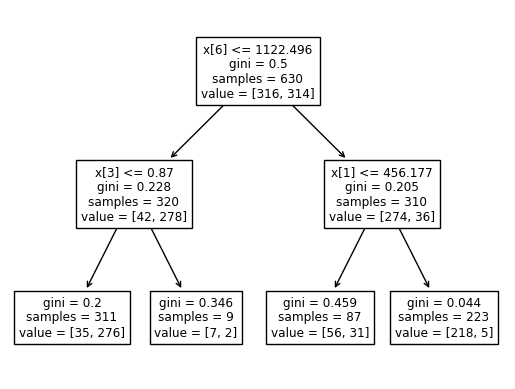

In [122]:
tree_model=DecisionTreeClassifier(max_depth=2);
tree_model.fit(X_train,Y_train);
plot_tree(tree_model)